In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")
include(pathtorepo * "dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

In [8]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra, JLD
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie

In [9]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [10]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [11]:
I0 = -1.7; U0 = 0.24;
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [8.516933929318748, 0.6578256737356879, 0.5888948000481755]

3-element Vector{Float64}:
 8.516933929318748
 0.6578256737356879
 0.5888948000481755

In [12]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.24, 0.305, 0.3, -1.7]
 time:          0.0
 state:         [8.516933929318748, 0.6578256737356879, 0.5888948000481755]


In [13]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [18]:
fp

3-dimensional StateSpaceSet{Float64} with 3 points
 1.21355  0.94979   0.97212
 8.19778  0.742533  0.458108
 3.03285  0.883301  0.925642

In [19]:
ei

3-element Vector{Vector{ComplexF64}}:
 [-12.281253955518212 - 6.522926487337364im, -12.281253955518212 + 6.522926487337364im, -0.30303030303059364 + 0.0im]
 [-3.6429862375962734 + 0.0im, 0.9209709932443471 - 12.440622188439276im, 0.9209709932443471 + 12.440622188439276im]
 [-8.567927931292664 + 0.0im, -0.3030303029943262 + 0.0im, 14.490465101996609 + 0.0im]

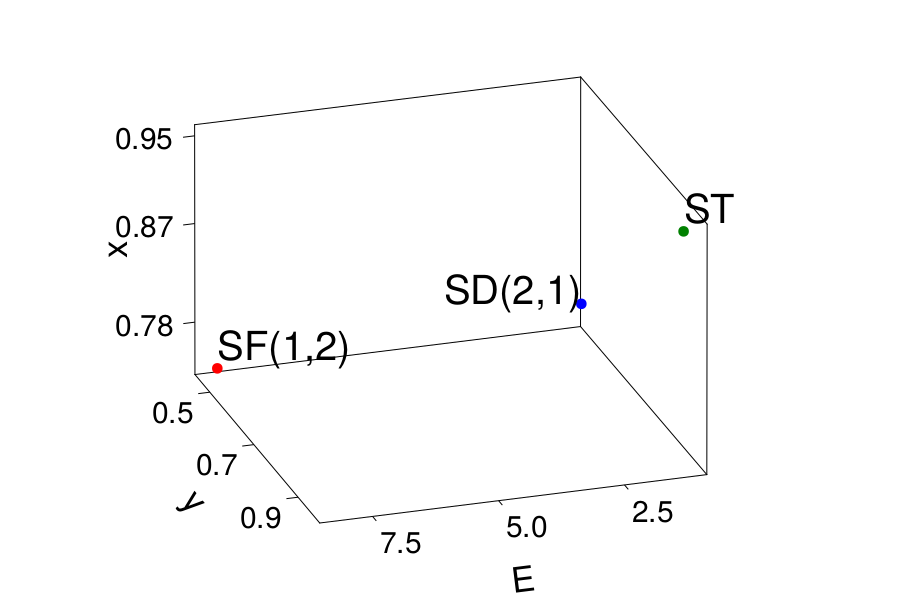

CairoMakie.Screen{IMAGE}


In [39]:
ts, tf = 100000, 110000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis, yticks = [0.5, 0.7, 0.9], zticks = [0.78, 0.87, 0.95])

scatter!(fp[1][idx], fp[1][idy], fp[1][idz], color = :green, markersize = 15)
text!(fp[1][idx], fp[1][idy], fp[1][idz], text = "ST", fontsize = 40)

scatter!(fp[2][idx], fp[2][idy], fp[2][idz], color = :red, markersize = 15)
text!(fp[2][idx], fp[2][idy], fp[2][idz], text = "SF(1,2)", fontsize = 40)

scatter!(fp[3][idx], fp[3][idy], fp[3][idz], color = :blue, markersize = 15)
text!(fp[3][idx], fp[3][idy], fp[3][idz], text = "SD(2,1)", fontsize = 40, align = (:right, :baseline))


display(f)

In [40]:
save("C:\\Users\\Alex\\Desktop\\all_fp.eps", f)

CairoMakie.Screen{EPS}
